In [1]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv("Air Quality Index- Delhi.csv")
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df.shape

(731, 9)

In [5]:
df = df.dropna()

array([[<Axes: title={'center': 'T'}>, <Axes: title={'center': 'TM'}>,
        <Axes: title={'center': 'Tm'}>],
       [<Axes: title={'center': 'SLP'}>, <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'VV'}>],
       [<Axes: title={'center': 'V'}>, <Axes: title={'center': 'VM'}>,
        <Axes: title={'center': 'PM 2.5'}>]], dtype=object)

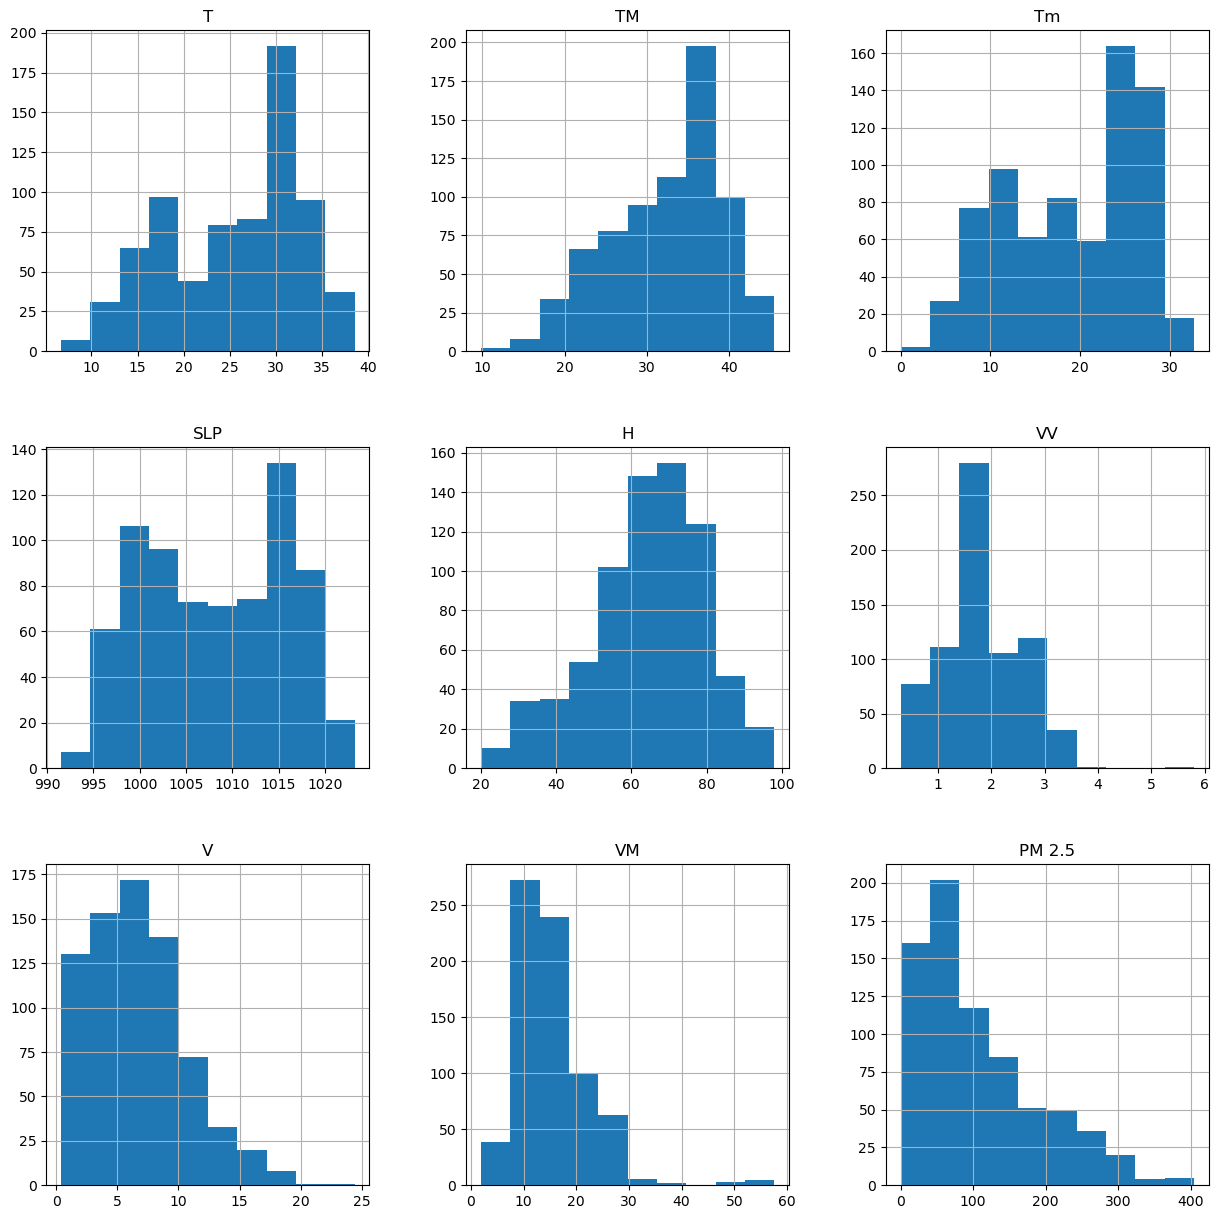

In [6]:
df.hist(figsize=(15, 15))

c:\Users\Richa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


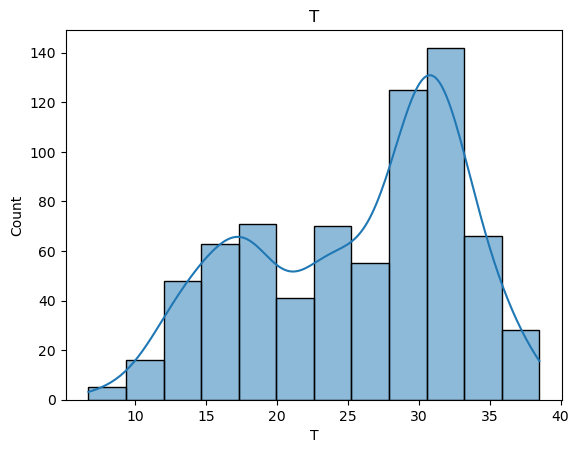

c:\Users\Richa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


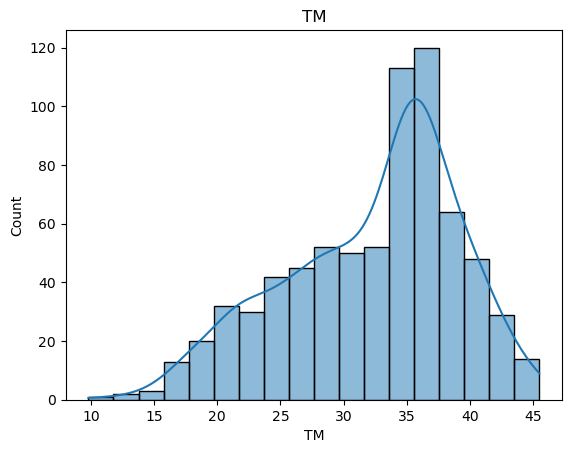

c:\Users\Richa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


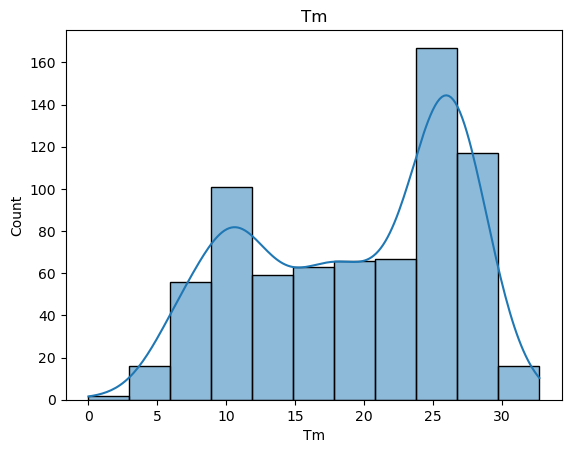

c:\Users\Richa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


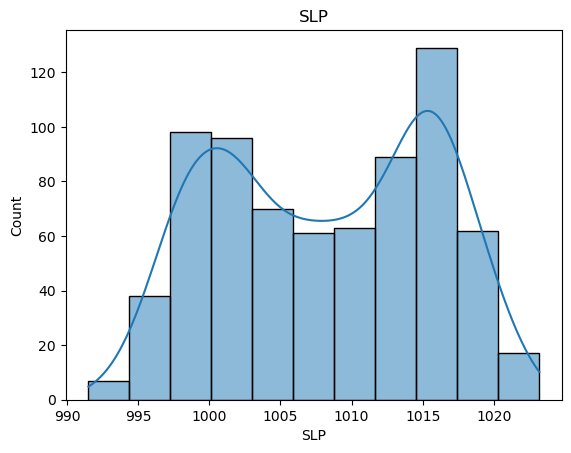

c:\Users\Richa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


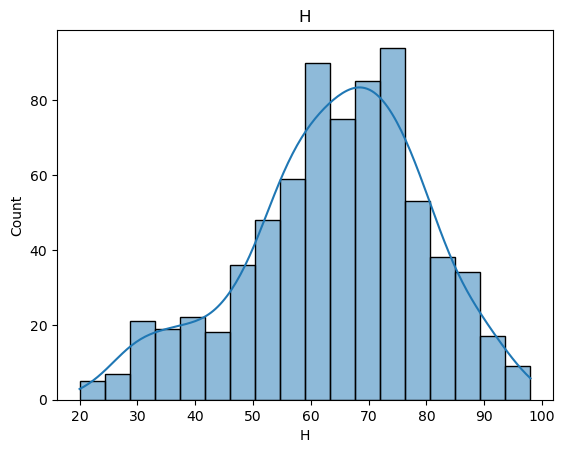

c:\Users\Richa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


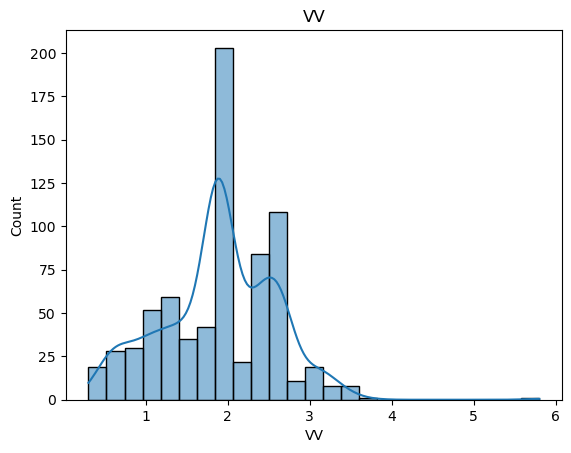

c:\Users\Richa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


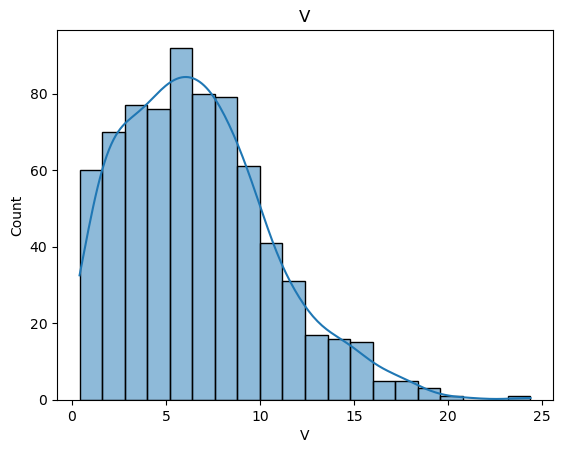

c:\Users\Richa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


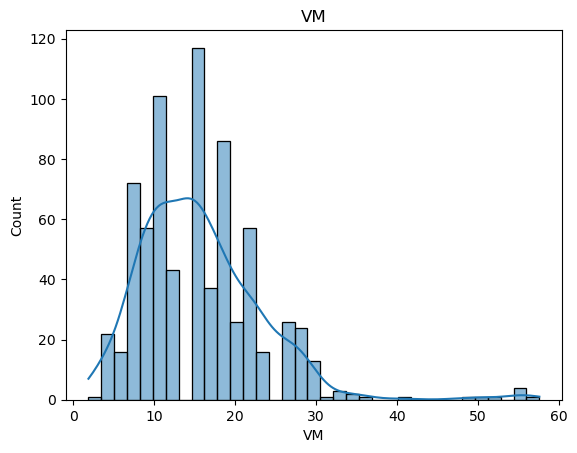

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["T", "TM", "Tm", "SLP", "H", "VV", "V", "VM"]
for col in cols:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
    plt.show()

In [8]:
X = df.drop("PM 2.5", axis=1)
y = df["PM 2.5"]

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
r2_score(y_test, y_pred)

0.6284008562593986

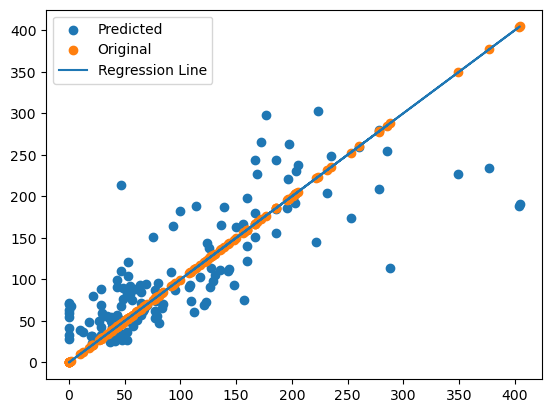

In [12]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.scatter(y_test, y_test)
plt.plot(y_test, y_test)
plt.legend(["Predicted", "Original", "Regression Line"])
plt.show()

In [13]:
import pickle
pickle.dump(sc,open('scaling.pkl','wb'))
pickle.dump(xgb,open('model.pkl','wb'))